In [12]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

# Teorema de Bayes



Analicemos el siguiente diagrama:

"Probabilidades de A y B"

![Imagen](https://calculo.cc/temas/temas_estadistica/probabilidad/imagenes/problemas/prob_boole/interseccion.gif)

Recordemos:

$P(A)$: Probabilidad de que ocurra un evento A.  
$P(B)$: Probabilidad de que ocurra un evento B.  
$P(A\cap B)$: Probabilidad de que ocurran los eventos A y B en simultáneo. Si son independientes: $P(A\cap B)=P(A).P(B)$.  

$P(A|B)$: Probabilidad de que haya ocurrido el evento A,si sabemos que ocurrió el evento B. Si son independientes: $P(A|B)=\frac{P(A\cap B)}{P(B)}$.

También podemos analizar qué pasa para el caso de $P(B|A)$, es decir, la probabilidad de que haya ocurrido el evento B, si sabemos que ocurrió el evento A. $P(B|A)=\frac{P(B\cap A)}{P(A)}$

Igualando $P(B\cap A)$ con $P(A\cap B)$ nos queda:

$P(A|B).P(B)=P(B|A).P(A)$

Despejando:

$$P(B|A)=\frac{P(A|B).P(B)}{P(A)}$$

A la ecuación anterior se la conoce como corolario del Teorema de Bayes. Es de particular interés en el ámbito de Machine Learning ya que a partir de un conjunto de observaciones nos permite estimar qué modelo dió origen a dichas observaciones.

Supongamos que tenemos causas $B_i$ y  efectos $A_j$. Las $B_i$ causas, pueden generar $A_j$ efectos.

Los efectos $A_j$ son exhaustivos es decir: $\sum_kP(A_j)=1$.
Las causas $B_i$ también son exhaustivas.

$P(B_i)$ es la probabilidad de que se dé la causa $B_i$.
$P(A_j)$ es la probabilidad de haber medido el efecto $A_j$.

Un ejemplo:

Tengo una bolsa con cinco monedas del tipo 1, cuya $p_1=0.3$, tres monedas del tipo 2, con $p_2=0.5$ y dos monedas del tipo 3, con  $p_3=0.8$.

Es decir, la distribución de probabilidad de medir el efecto A (que salga H o T) estará condicionada por la causa B (usar una moneda de tipo 1, 2 o 3).

$P(B_i)$ Es la probabilidad de sacar de la bolsa una moneda tipo $i$. Por lo tanto:
  
|   |  tipo 1 <br>(5 monedas)<br>(50%) |  tipo 2 <br>(3 monedas)<br>(30%) |  tipo 3 <br>(2 monedas)<br>(20%) |
|---|---|---|---|
| H (cara)  |  p1 = 0.3 | p2 = 0.5  | p3 = 0.8  |
| T (seca)  |  1 - p1 = 0.7 |  1 - p2 = 0.5 | 1 - p3 = 0.2  |

Supongamos ahora que las monedas son indistinguibles entre sí y solo tengo el dato de las $P(B_i)$. Una forma de sacar una moneda al azar de la bolsa y determinar a qué tipo pertenece, es tirarla n veces y hacerme la siguiente pregunta:

¿Qué probabilidad hay de haber sacado una moneda del tipo 1 y haber obtenido este resultado? ¿Y de haber sacado una moneda del tipo 2 y haber obtenido este resultado? ¿Y tipo 3?

Es decir nos interesa estimar las probabilidades $P(B_1|A_j)$, $P(B_2|A_j)$ y $P(B_3|A_j)$.

Nuevamente: $P(B_1|A_j)$ puede leerse como "La probabilidad de haber sacado una moneda del tipo 1 si el resultado de arrojarla n veces fue $A_j$. Si calculamos todos los $P(B_i|A_j)$ podemos compararlos entre sí y decir que la causa $B_i$ fue aquella que tiene la probabilidad $P(B_i|A_j)$ mas alta.

Si aplicamos el Teorema de Bayes:

$$P(B_i|A_j)=\frac{P(A_j|B_i).P(B_i)}{P(A_j)}$$

Si sólo nos interesa comparar las $P(B_i|A_j)$ para saber cuál es la causa mas probable, podemos evitar calcular $P(A_j)$ ya que es el mismo para todas las $P(B_i|A_j)$ y solo comparar los numeradores. Podemos definir:

$$\mathcal{L}_i=P(A_j|B_i).P(B_i)$$

A $\mathcal{L}_i$ se lo denomina "medida de verosimilitud de la causa o modelo i". En inglés se lo denomina Likelihood.

Elegir qué modelo es mas probable que haya generado ese efecto (u observación) es equivalente a elegir al modelo cuya medida de verosimilitud sea mayor.

Volviendo a la $P(A_j)$ que dejamos de lado, la misma puede ser calculada como:

$$P(A_j)=\sum_k{P(A_j|B_k).P(B_k)}$$

Por lo tanto, las probabilidades $P(B_i|A_j)$ equivalen al Likelihood normalizado. Es decir:

$$P(B_i|A_j)=\frac{\mathcal{L}_i}{\sum_k{\mathcal{L}_k}}=\frac{P(A_j|B_i).P(B_i)}{\sum_k{P(A_j|B_k).P(B_k)}}$$



##Ejecucion del Teorema



Apliquemos ahora estos conceptos a resolver el siguiente problema:

Dadas las moneda en la bolsa descriptas anteriormente, se realiza el siguiente experimento:

Se saca una moneda al azar, se tira 3 veces la moneda y se obtiene el siguiente resultado:

H-H-T

- Estimar el tipo de moneda
- Calcular la probabilidad de que la estimación sea errónea
- Calcular la probabilidad de que la moneda sea de tipo 3

Repetir el problema si lo que se obtuvo fue H-H-T-T-H-T-H

In [13]:


#Calculo el likelihood del modelo 1:
p1=0.3 #probabilidad de sacar cara para la moneda del tipo 1
p2=0.5
p3=0.8
PB1=0.5 #Probabilidad de sacar una moneda tipo 1 de la bolsa
PB2=0.3
PB3=0.2
L1=p1*p1*(1-p1)*PB1
L2=p2*p2*(1-p2)*PB2
L3=p3*p3*(1-p3)*PB3

print("La medida de verosimilitud del modelo 1 para la observación H-H-T es:{}".format(L1))
print("La medida de verosimilitud del modelo 2 para la observación H-H-T es:{}".format(L2))
print("La medida de verosimilitud del modelo 3 para la observación H-H-T es:{}".format(L3))

La medida de verosimilitud del modelo 1 para la observación H-H-T es:0.0315
La medida de verosimilitud del modelo 2 para la observación H-H-T es:0.0375
La medida de verosimilitud del modelo 3 para la observación H-H-T es:0.0256


Por lo tanto el modelo mas probable es el 2. Para saber cual es la probabilidad de que la estimación sea errónea tenemos que calcular las probabilidades condicionales. Lo podemos hacer normalizando con respecto a la suma de los Likelihoods.

In [14]:
print("La probabilidad de que la estimación sea correcta es:{}".format(L2/(L1+L2+L3)))
print("La probabilidad de que la estimación sea errónea es:{}".format(1-L2/(L1+L2+L3)))
print("La probabilidad de que la moneda sea del tipo 3 es:{}".format(L3/(L1+L2+L3)))

La probabilidad de que la estimación sea correcta es:0.3964059196617336
La probabilidad de que la estimación sea errónea es:0.6035940803382664
La probabilidad de que la moneda sea del tipo 3 es:0.27061310782241016


Por lo tanto si bien la estimación es que la moneda es del tipo 2, lo mas probable es que estemos equivocados. Para H-H-T-T-H-T-H:

In [15]:
L1=p1**4*(1-p1)**3*PB1
L2=p2**4*(1-p2)**3*PB2
L3=p3**4*(1-p3)**3*PB3

print("La medida de verosimilitud del modelo 1 para la observación H-H-T es:{}".format(L1))
print("La medida de verosimilitud del modelo 2 para la observación H-H-T es:{}".format(L2))
print("La medida de verosimilitud del modelo 3 para la observación H-H-T es:{}".format(L3))

La medida de verosimilitud del modelo 1 para la observación H-H-T es:0.0013891499999999996
La medida de verosimilitud del modelo 2 para la observación H-H-T es:0.00234375
La medida de verosimilitud del modelo 3 para la observación H-H-T es:0.0006553599999999998


In [16]:
print("La probabilidad de que la estimación sea correcta es:{}".format(L2/(L1+L2+L3)))
print("La probabilidad de que la estimación sea errónea es:{}".format(1-L2/(L1+L2+L3)))
print("La probabilidad de que la moneda sea del tipo 3 es:{}".format(L3/(L1+L2+L3)))

La probabilidad de que la estimación sea correcta es:0.5340955184970808
La probabilidad de que la estimación sea errónea es:0.4659044815029192
La probabilidad de que la moneda sea del tipo 3 es:0.1493439313076253


A medida que aumenta la cantidad de muestras la estimación se va haciendo cada vez mas precisa, pero los valores de probabilidad son cada vez mas chicos, lo cual puede traer problemas para observaciones muy grandes por ejemplo, clasificación de artículos periodísticos o detección de SPAM, ya que estaría compuesto una gran cantidad de multiplicaciones de números mucho mas chicos que 1. Por ello es que se suele utilizar el Log-Likelihood ($\mathcal{logL}$).

El logaritmo es monótono creciente, por lo que la relación entre los Likelihoods no se ve alterada a la hora de compararlos.  
Las multiplicaciones se convierten en suma, por lo que es mucho menos probable que estemos trabajando en los límites de la precisión del procesador.

Para el caso del H-H-T-T-H-T-H los $\mathcal{logL}_i$ quedan:

In [17]:
import math
logL1=4*math.log(p1)+3*math.log(1-p1)+math.log(PB1)
logL2=4*math.log(p2)+3*math.log(1-p2)+math.log(PB2)
logL3=4*math.log(p3)+3*math.log(1-p3)+math.log(PB3)

print("El Log-Likelihood del modelo 1 para la observación H-H-T-T-H-T-H es:{}".format(logL1))
print("El Log-Likelihood del modelo 2 para la observación H-H-T-T-H-T-H es:{}".format(logL2))
print("El Log-Likelihood del modelo 3 para la observación H-H-T-T-H-T-H es:{}".format(logL3))


El Log-Likelihood del modelo 1 para la observación H-H-T-T-H-T-H es:-6.579063229679887
El Log-Likelihood del modelo 2 para la observación H-H-T-T-H-T-H es:-6.056003068245553
El Log-Likelihood del modelo 3 para la observación H-H-T-T-H-T-H es:-7.330325854993241


# Interpretación del Teorema de Bayes

## Conocimiento a Priori vs Observaciones

Los siguientes datos son ficticios:

Usted es una mujer que ya cruzó la barrera de los 40 años. Supongamos que su médico de cabecera le sugiere que se haga una mamografía de rutina. Es lo que indica el protocolo. En principio, el médico le dice que solamente el 1 por ciento de mujeres de su edad tienen cáncer de mama, o sea una mujer de cada cien. --> $P(C)=0.01$ --> $P(NC)=0.99$ --> Prevalencia

Pero le agrega otros datos que usted debe conocer. El test ¡no es infalible! ¿Qué quiere decir esto?

Cuando se habla de mamografías, se sabe que el 80% de las mujeres que tienen cáncer de mama tendrán un resultado positivo. --> $P(+|C)=0.8$ --> Sensibilidad

Leído de otra manera, esto es lo mismo que decir que al test se le escapan el 20% de las mujeres que se hacen el estudio pero que sí están enfermas. --> $P(-|C)=0.2$ --> Falsos Negativos

Pero también se sabe (y esto es muy importante) que 9.6% de mujeres que no tienen cáncer de mama tendrán igualmente un resultado positivo de la mamografía. Es decir, el resultado será positivo pero la mujer no tiene cáncer. A este grupo se lo conoce con el nombre de falsos positivos. $P(+|NC)=0.096$ --> Falsos Positivos. $P(-|NC)=0.904$ --> Especificidad.  

$$ FP = 1 - Especificidad $$

Ahora sí, con toda esta información, usted se hace el test y cuando le entregan los resultados, lee que la mamografía resulta positiva.

Pregunta: ¿cuál es la probabilidad de que usted tenga en realidad cáncer de mama? --> ¿$P(C|+)$? -->VPP (Valor Predictivo positivo)

# Interpretación del Teorema de Bayes 2

## Estimación de parámetros de un modelo


Una opción es no hacer ninguna suposición con respecto a la distribución a Priori de los parámetros del modelo y maximizar directamente el likelihood.
A esta técnica se la conoce como MLE (Maximum Likelihood Estimation).

Quiero hallar los parámetros $W$ de una distribución que hagan que la probabilidad de tener las observaciones a la salida sea máxima. Es decir, quiero maximizar:

$$ P(X|W) $$

donde:

$$ X = [x_1, x_2, ..., x_N] $$

X es un vector con las N observaciones.

Si las observaciones son independientes, quiero maximizar:

$$ P(x_1|W)P(x_2|W)...P(x_N|W) $$

### Ejemplo: Estimar el parámetro p de una distribución de Bernoulli que haya sido ensayada N veces

La probabilidad de haber tenido una salida con $ \#1=k $ luego de haber ensayado la V.A N veces es:

$$P(\#1=k|p)=p^{k}(1-p)^{N-k}$$

En nuestro caso $P(\#1=k|p)$ es el likelihood. Si buscamos un estimador de máxima verosimilitud (MLE) la forma de hallarlo es hallando el valor de p que maximice $P(\#1=k|p)$. Para ello podemos derivar P e igualar a cero. Como truco matemático en vez de derivar P, vamos a derivar el $\log P$ e igualarlo a cero. Como el logaritmo es monótono creciente, la ubicación del máximo no cambia. A $\log P$ se lo suele llamar Log Likelihood.



# Clasificacion Bayesiana - Histograma

## Funciones armadas

In [18]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

def get_class_prob_naive(x_data, y_data, joint_class_1, joint_class_2, likelihood_indep_class_1, likelihood_indep_class_2):
    prior_class_1 = joint_class_1.N/ (joint_class_1.N + joint_class_2.N)
    prior_class_2 = joint_class_2.N/ (joint_class_1.N + joint_class_2.N)
    likelihood_class_1 = likelihood_indep_class_1[joint_class_1.data_to_index(x_data, y_data)] 
    likelihood_class_2 = likelihood_indep_class_2[joint_class_2.data_to_index(x_data, y_data)]
    total = likelihood_class_1*prior_class_1 + prior_class_2*likelihood_class_2
    # Evita division por cero
    total[total==0] = 1
    p_class_1 = prior_class_1*likelihood_class_1/total
    p_class_2 = prior_class_2*likelihood_class_2/total
    # Las indeterminadas en 0.5
    p_class_1[total==1] = 0.5
    p_class_2[total==1] = 0.5
    return p_class_1, p_class_2

def get_class_prob(x1_data, x2_data, joint_class_1, joint_class_2):
        prior_class_1 = joint_class_1.N/ (joint_class_1.N + joint_class_2.N)
        prior_class_2 = joint_class_2.N/ (joint_class_1.N + joint_class_2.N)
        likelihood_class_1 = joint_class_1.get_prob(x1_data, x2_data)
        likelihood_class_2 = joint_class_2.get_prob(x1_data, x2_data)
        total = likelihood_class_1*prior_class_1 + prior_class_2*likelihood_class_2
        # Evita division por cero
        total[total==0] = 1
        p_class_1 = prior_class_1*likelihood_class_1/total
        p_class_2 = prior_class_2*likelihood_class_2/total
        # Las indeterminadas en 0.5
        p_class_1[total==1] = 0.5
        p_class_2[total==1] = 0.5
        return p_class_1, p_class_2

class BiVariateJoint:
    def __init__(self, data, step_X = 1, step_Y = 1, mins=None, maxs=None):
        # Data tienen que ser un np.array de dos columnas
        self.step_X = step_X
        self.step_Y = step_Y
        step = np.array([step_X, step_Y])
        self.data = data
        self.data_rounded = (np.round(data/step)*step)
        if maxs is None:
            self.maxs = np.max(self.data_rounded, axis = 0) + 1
        else:
            self.maxs = maxs
        if mins is None:
            self.mins = np.min(self.data_rounded, axis = 0) - 1
        else:
            self.mins = mins
        tuples = [tuple(row) for row in self.data_rounded]
        self.frequencies = Counter(tuples)
        # Agrego uno adelante y otro atras para cubrirme
        count_X = int(np.round((self.maxs[0] - self.mins[0])/step_X)) + 1
        count_Y = int(np.round((self.maxs[1] - self.mins[1])/step_Y)) + 1
        self.X = np.linspace(self.mins[0] - step_X, self.mins[0] + step_X*count_X, count_X + 2)
        self.Y = np.linspace(self.mins[1] - step_Y, self.mins[1] + step_Y*count_Y, count_Y + 2)
        self.joint_matrix = self.freq_2_matrix()
        self.N = len(data)
    
    def plot_data(self, color='b'):
        plt.scatter(self.data[:,0], self.data[:,1], color=color, s=2)
    
    def plot_rounded(self, color='b'):
        plt.scatter(self.data_rounded[:,0], self.data_rounded[:,1], color=color, s=2)
    
    def data_to_index(self, x, y):
        x = np.round((x - self.X[0])/self.step_X).astype(int)
        y = np.round((y - self.Y[0])/self.step_Y).astype(int)
        return x, y

    def get_prob(self, x, y, normalized=True):
        x, y = self.data_to_index(x, y)
        if normalized:
            prob = self.joint_matrix[x , y]/self.N
        else:
            prob = self.joint_matrix[x , y]
        return prob
    
    def freq_2_matrix(self):
        joint = np.zeros([len(self.X), len(self.Y)])
        for index, frec in self.frequencies.items():
            x = (index[0] - self.X[0])/self.step_X
            y = (index[1] - self.Y[0])/self.step_Y
            joint[int(x), int(y)] = frec
        return joint
    
    def get_Marginals(self, normalized=True):
        if normalized:
            marg_1 = self.joint_matrix.sum(axis=1)/self.N
            marg_2 = self.joint_matrix.sum(axis=0)/self.N
        else:
            marg_1 = self.joint_matrix.sum(axis=1)
            marg_2 = self.joint_matrix.sum(axis=0)
        return marg_1, marg_2
    
    def plot_joint_3d(self, joint_matrix = None, el=50, az=-5, ax=None, color='b', title=''):
        xpos, ypos = np.meshgrid(self.X, self.Y)
        xpos = xpos.T.flatten()
        ypos = ypos.T.flatten()
        zpos = np.zeros(xpos.shape)
        dx = self.step_X * np.ones_like(zpos)
        dy = self.step_Y * np.ones_like(zpos)
        if joint_matrix is None:
            dz = self.joint_matrix.astype(int).flatten()
        else:
            dz = joint_matrix.flatten()
        if ax == None:
            fig = plt.figure(figsize=(20,20))
            ax = fig.add_subplot(111, projection='3d')
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color, alpha=0.5)
        ax.set_title(title)
        ax.view_init(el, az)

## Comienzo con la demostracion

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [20]:
data = pd.read_csv("https://raw.githubusercontent.com/lab-pep-itba/Clase-3---Clasificadores-Bayesianos/master/data/alturas-pesos-mils-train.csv?raw=true") #[:100]
test = pd.read_csv("https://raw.githubusercontent.com/lab-pep-itba/Clase-3---Clasificadores-Bayesianos/master/data/alturas-pesos-mils-test.csv?raw=true")


In [21]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

### Grafico los datos

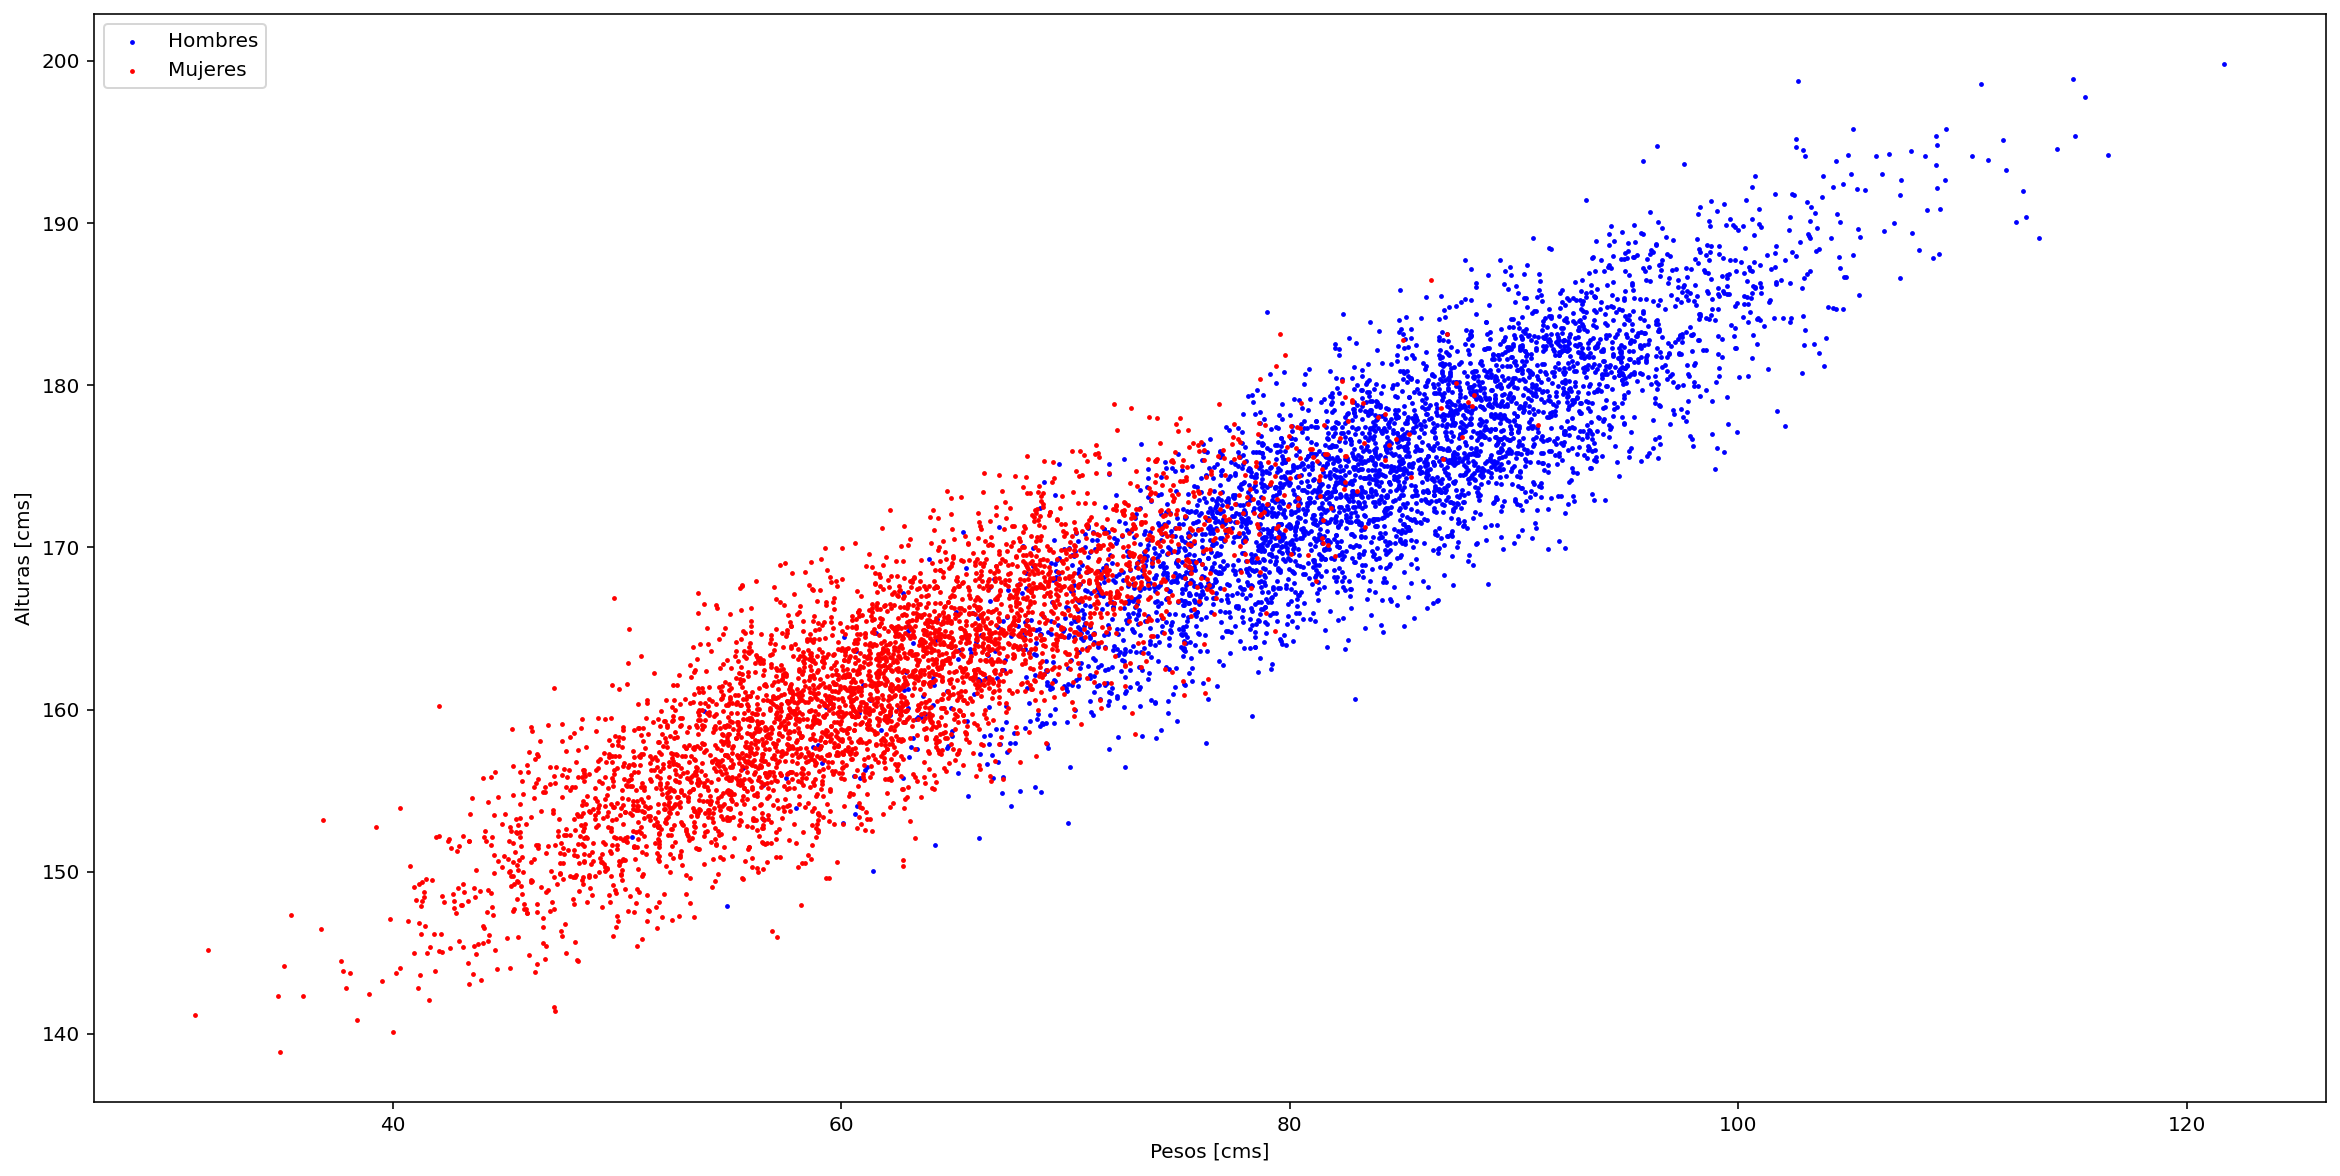

In [22]:
%matplotlib inline
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

### Regla de Bayes (Discreto)
\begin{equation}
C_0  \rightarrow Hombre \\
C_1 \rightarrow Mujer \\
X_1 \rightarrow Peso \\
X_2 \rightarrow Altura \\
\end{equation}

\begin{equation}
P(C_0 | X_1, X_2) = \frac{P(X_1,X_2 | C_0) P(C_0)}{P(X_1,X_2)} \\
\end{equation}

\begin{equation}
P(C_1 | X_1, X_2) = \frac{P(X_1,X_2 | C_1) P(C_1)}{P(X_1,X_2)}
\end{equation}

\begin{equation}
P(C_0 | X_1, X_2)  \rightarrow p \\
P(C_1 | X_1, X_2) \rightarrow (1-p) \\
\end{equation}
### Log-odds
\begin{equation}
\frac{p}{1-p} = \frac{P(X_1,X_2 | C_0) P(C_0)}{
 P(X_1,X_2 | C_1) P(C_1)}
\end{equation}

Que tenemos?
\begin{equation}
P(Hombre) = \frac{N_{H}}{N_H + N_M} \quad
\end{equation}

\begin{equation}
P(Mujer) = \frac{N_{M}}{N_H + N_M} \quad
\end{equation}


\begin{equation}
\large
P(X_1,X_2) = P(X_1,X_2 | Mujer) P(Mujer) + P(X_1,X_2 | Hombre) P(Hombre)
\end{equation}

Con estimar:
\begin{equation}
P(X_1,X_2 | Mujer) \quad y \quad
P(X_1,X_2 | Hombre) 
\end{equation}

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Hombre) = \frac{N_{x_1x_2H}}{N_H}
\end{equation}

\begin{equation}
P(X_1 = x_1,X_2 = x_2 | Mujer) = \frac{N_{x_1x_2M}}{N_M}
\end{equation}

### Resolución del histograma (Cantidad de Bins o Grupos)

In [23]:
step = 2
maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

joint_hombres = BiVariateJoint(data_hombres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs
                              )
joint_mujeres = BiVariateJoint(data_mujeres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs)

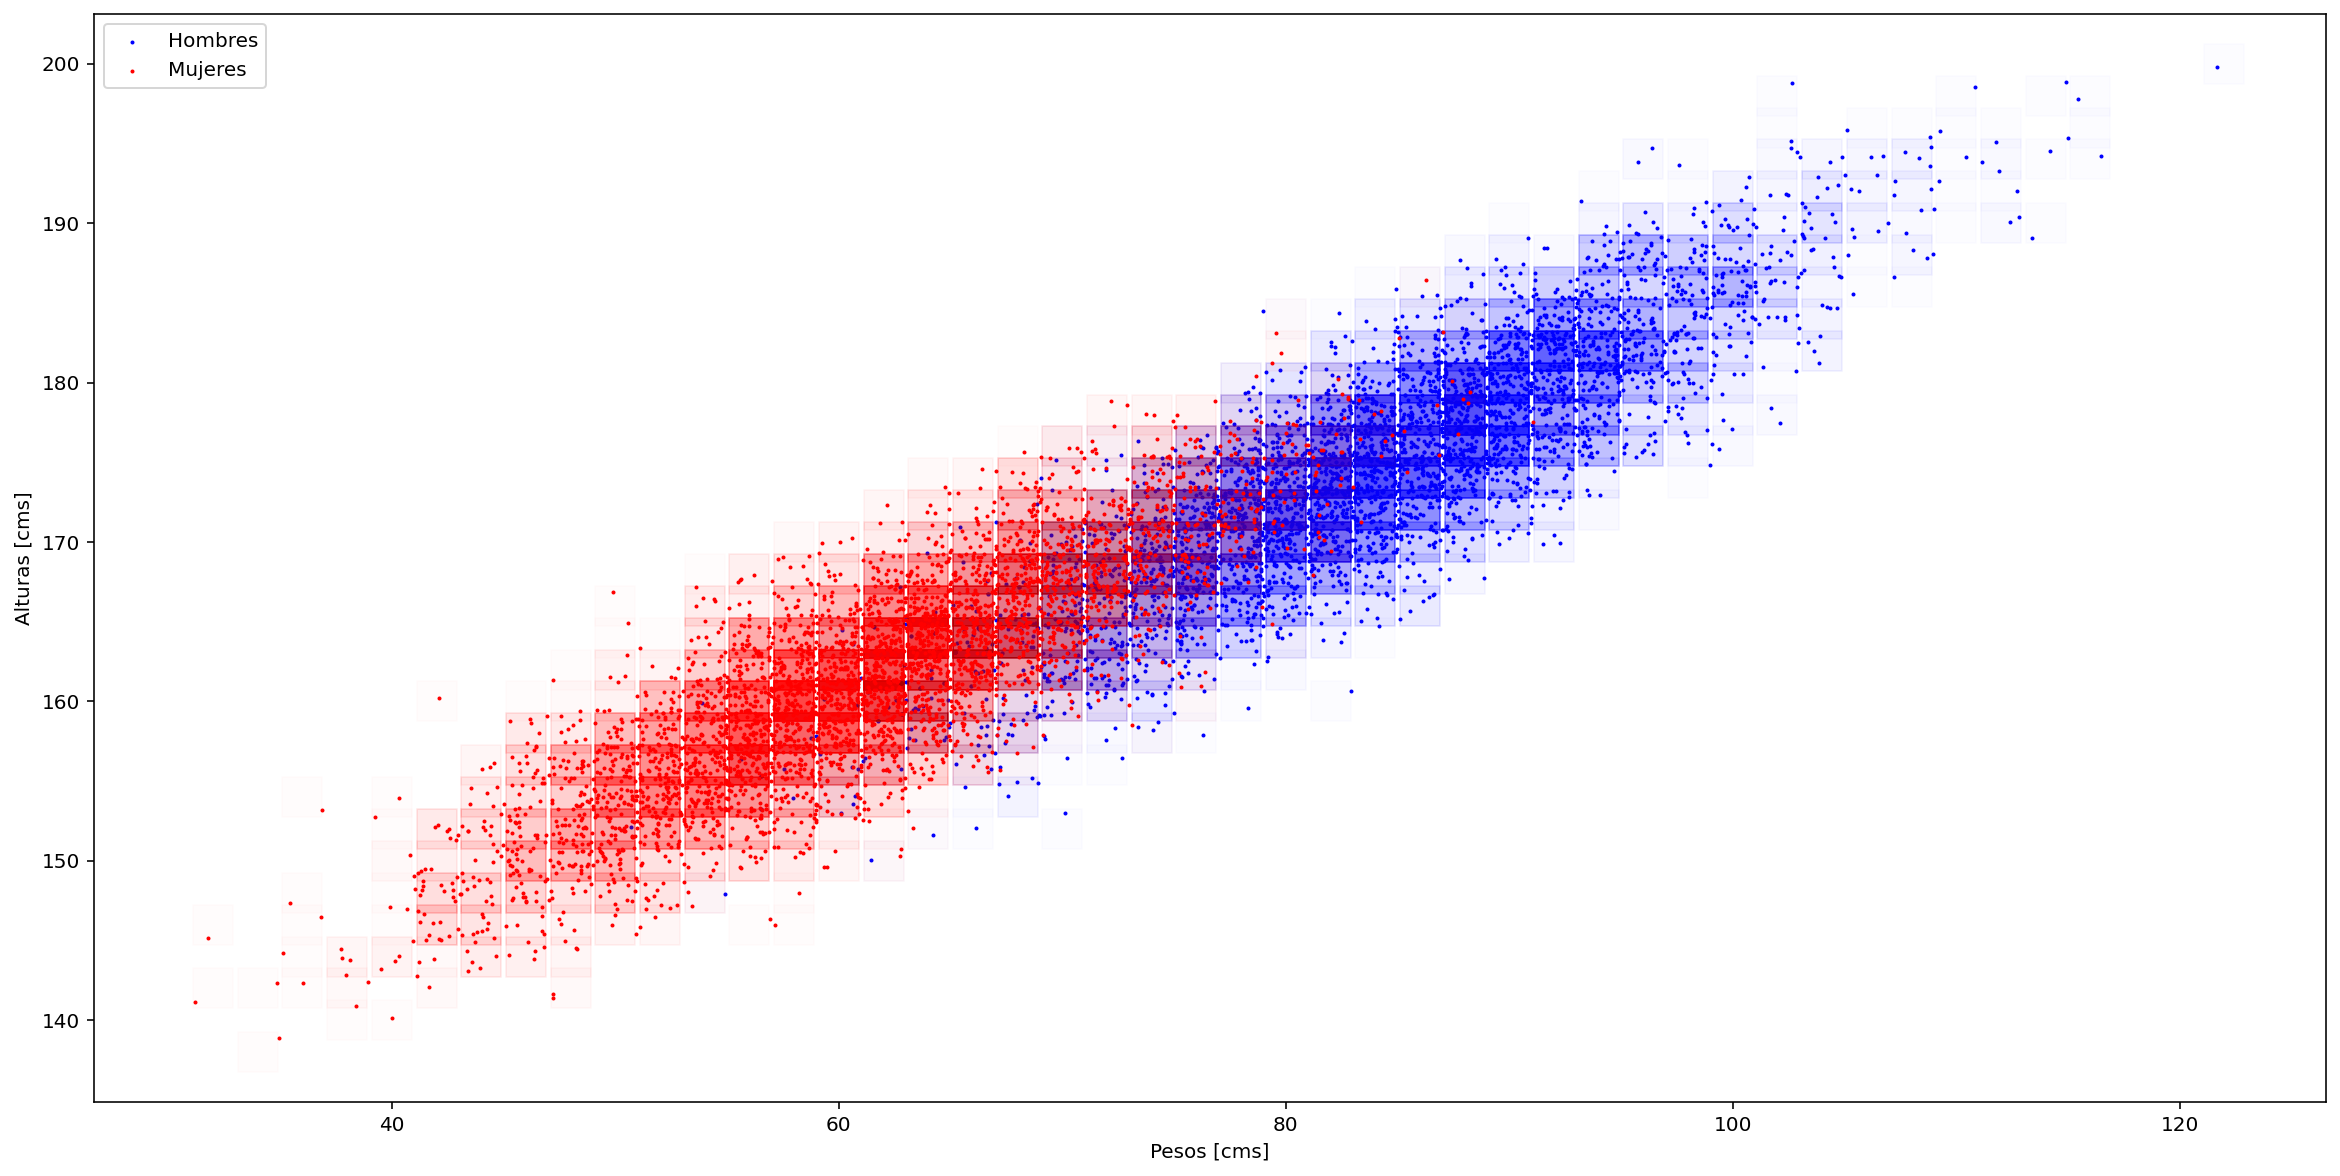

In [24]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(joint_hombres.data_rounded[:,0], joint_hombres.data_rounded[:,1], color='b', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_hombres.data[:,0], joint_hombres.data[:,1], color='b', s=1,  alpha=1, label='Hombres')
ax.scatter(joint_mujeres.data_rounded[:,0], joint_mujeres.data_rounded[:,1], color='r', s=200 * step, marker='s', alpha=0.01)
ax.scatter(joint_mujeres.data[:,0], joint_mujeres.data[:,1], color='r', s=1,  alpha=1, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

In [25]:
def getAxis():
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
#     ax1.set_aspect('equal')
#     ax2.set_aspect('equal')
    ax1.set_xlabel('Pesos [cms]')
    ax1.set_ylabel('Alturas [cms]')
    ax2.set_xlabel('Pesos [kgs]')
    ax2.set_ylabel('Alturas [cms]')
    ax2.set_zlabel('Frecuencia')
    fig.tight_layout()
    return ax1, ax2

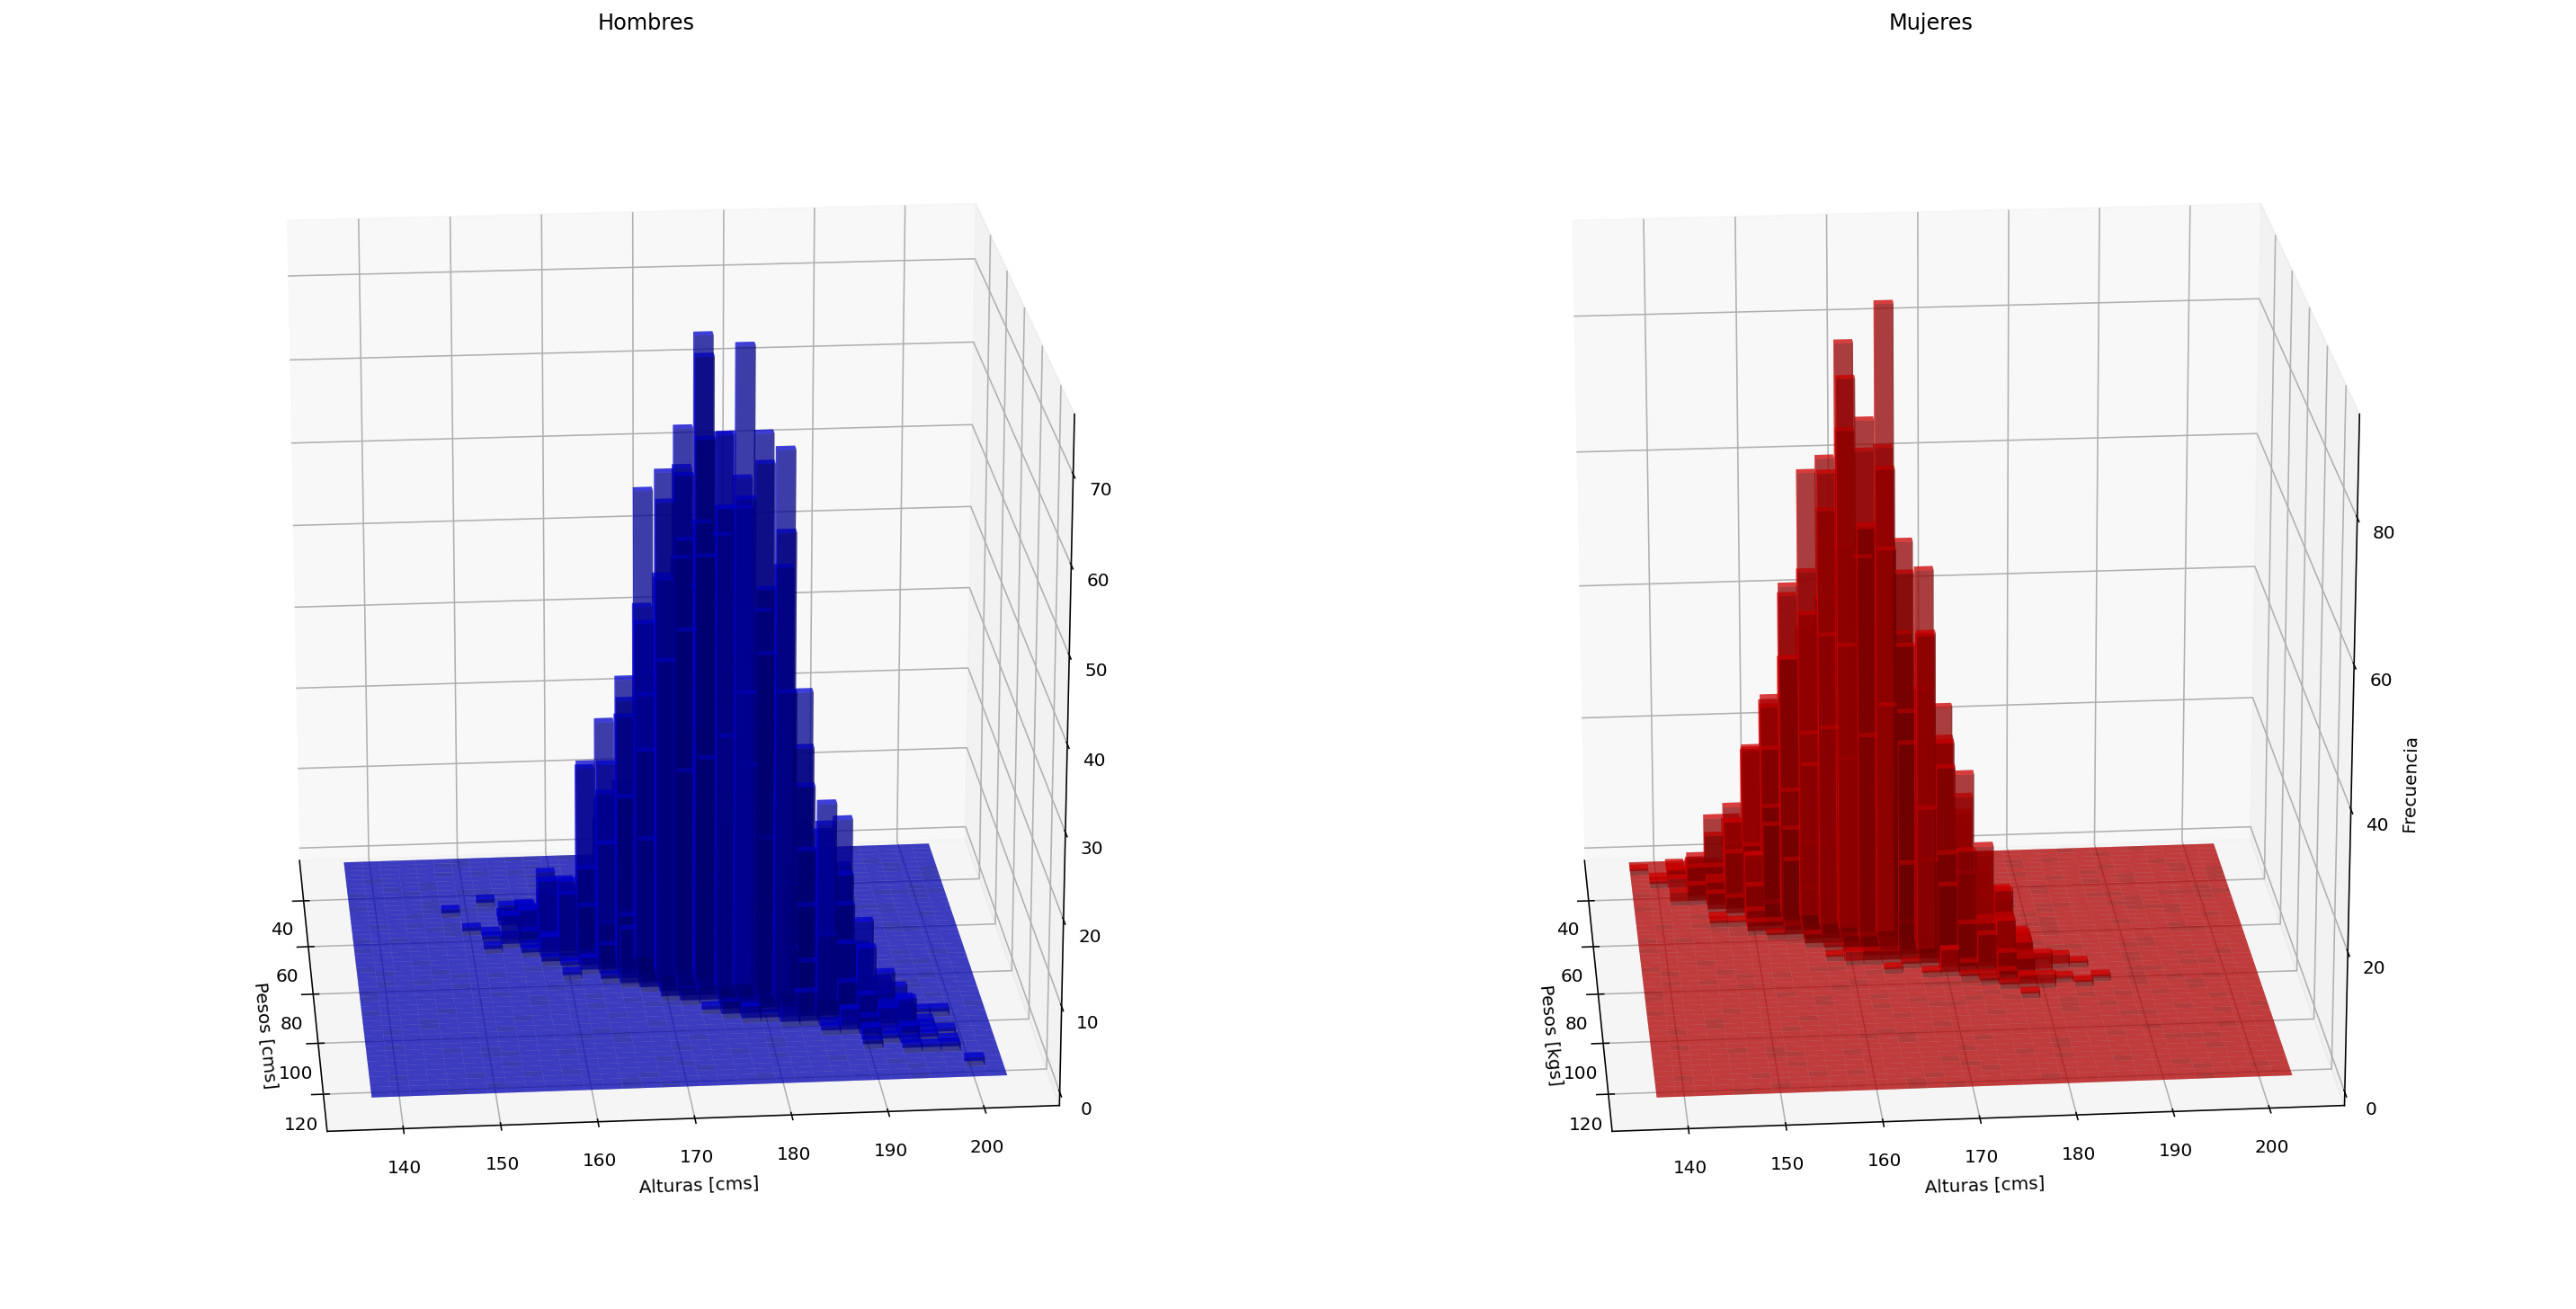

In [26]:
%matplotlib inline
ax1, ax2 = getAxis()
joint_hombres.plot_joint_3d(ax=ax1, color='b', el=20, az=-5, title='Hombres')
joint_mujeres.plot_joint_3d(ax=ax2, color='r', el=20, az=-5, title='Mujeres')

### Calculo a posteriori
\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1,X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
\end{equation}


In [27]:
p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
print(acc_train_bayes)

0.90875


In [28]:
p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print(acc_cv_bayes)

0.908


### Las clases en el plano

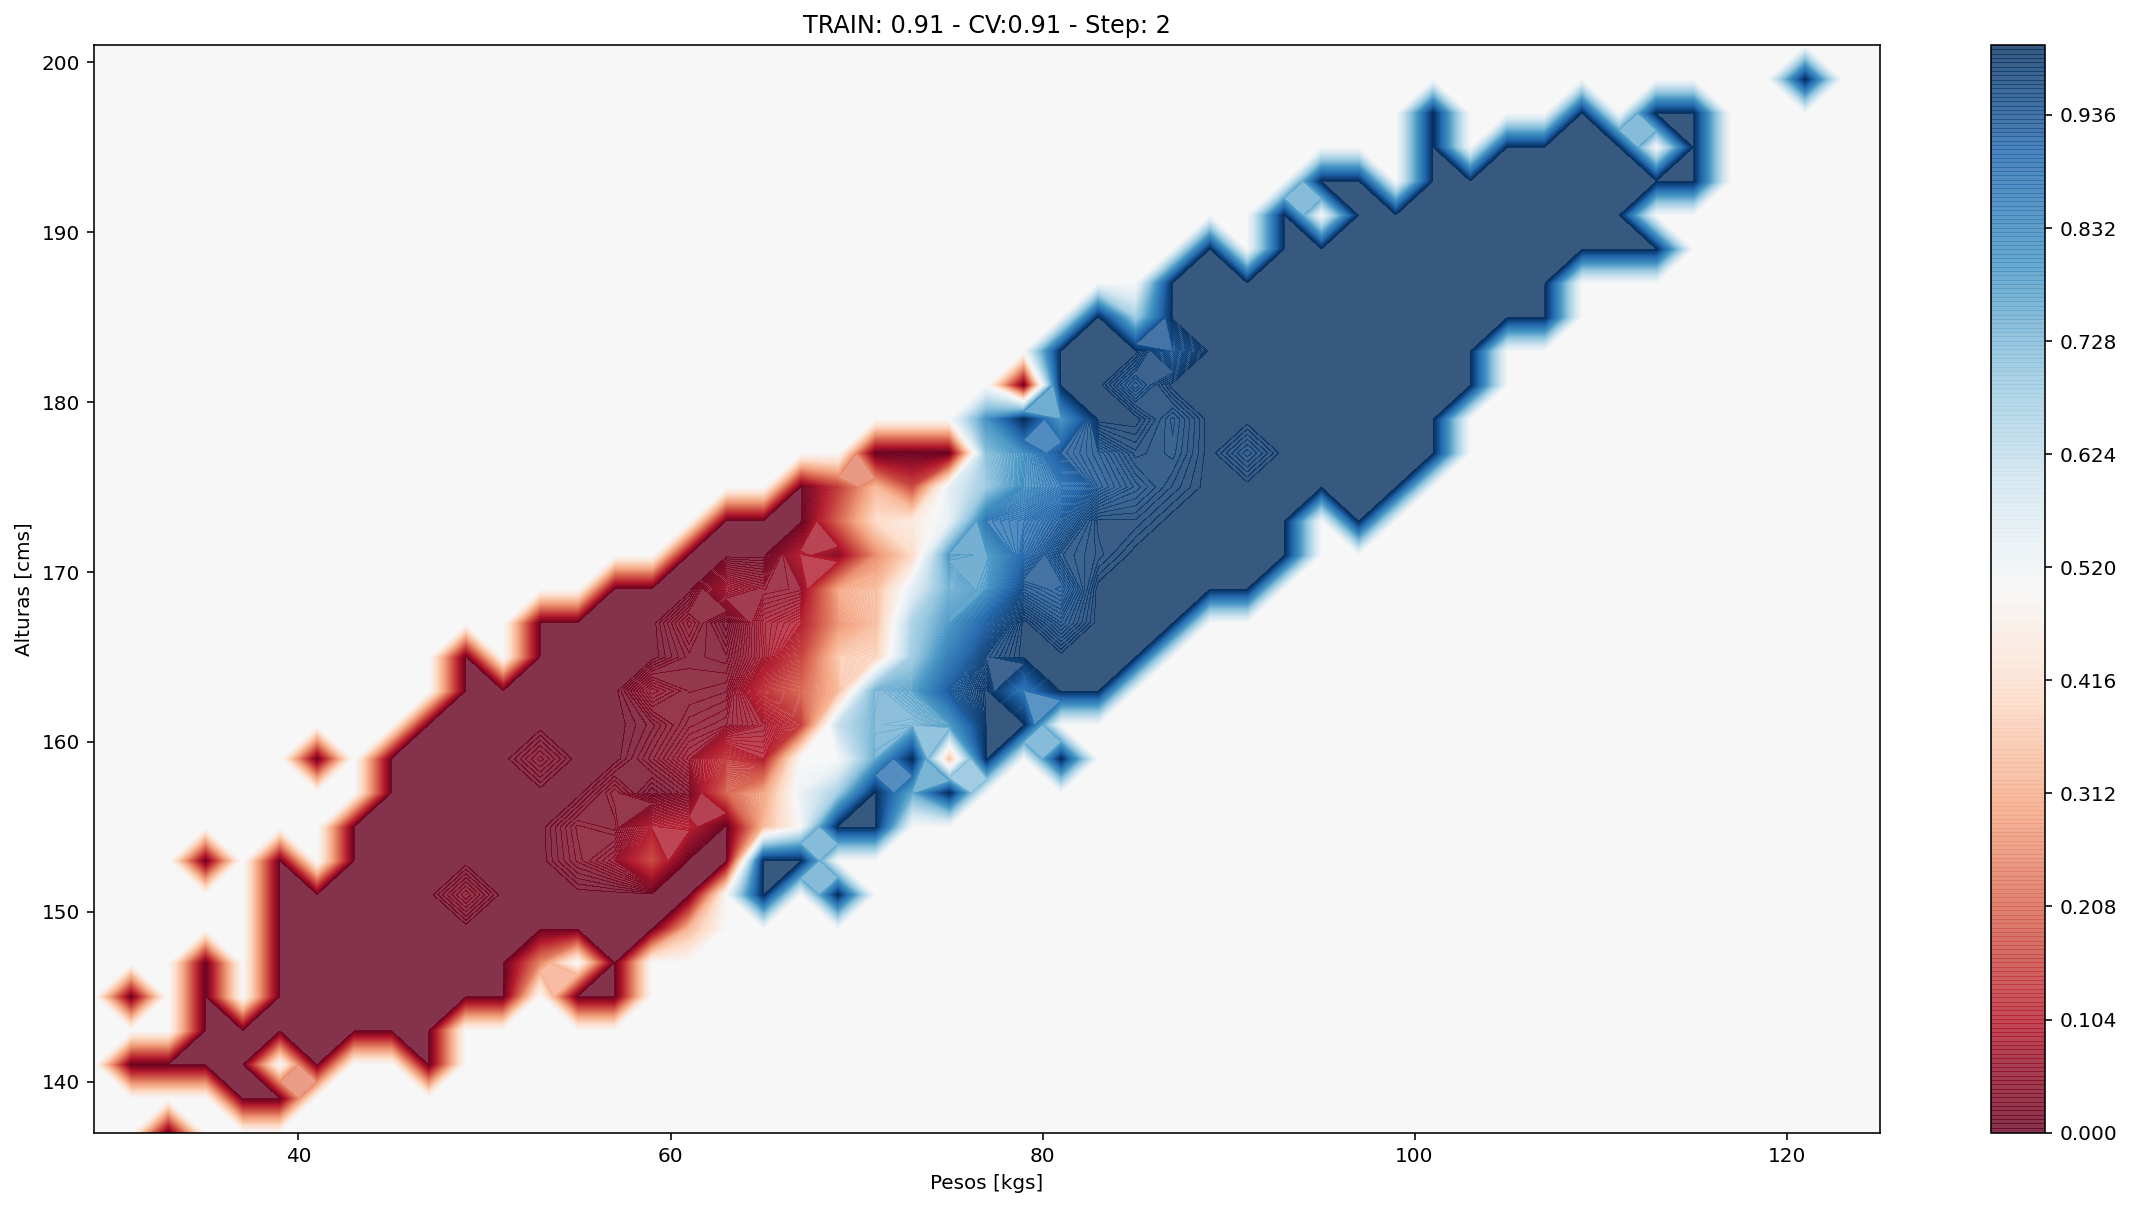

In [29]:
%matplotlib inline
from matplotlib.colors import ListedColormap
X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = get_class_prob(X[i], Y[i], joint_hombres, joint_mujeres)[0]
    
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_bayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

In [30]:
train_acc = []
test_acc = []
steps = [2, 4,  8, 16, 32]
for step in steps:
    maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
    mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

    joint_hombres = BiVariateJoint(data_hombres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs
                                  )
    joint_mujeres = BiVariateJoint(data_mujeres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs)
    p_class_1, p_class_2 = get_class_prob(data['Peso'].values, data['Altura'].values, joint_hombres, joint_mujeres)
    acc_train_bayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
    train_acc.append(acc_train_bayes)
    p_class_1, p_class_2 = get_class_prob(test['Peso'].values, test['Altura'].values, joint_hombres, joint_mujeres)
    acc_cv_bayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
    test_acc.append(acc_cv_bayes)

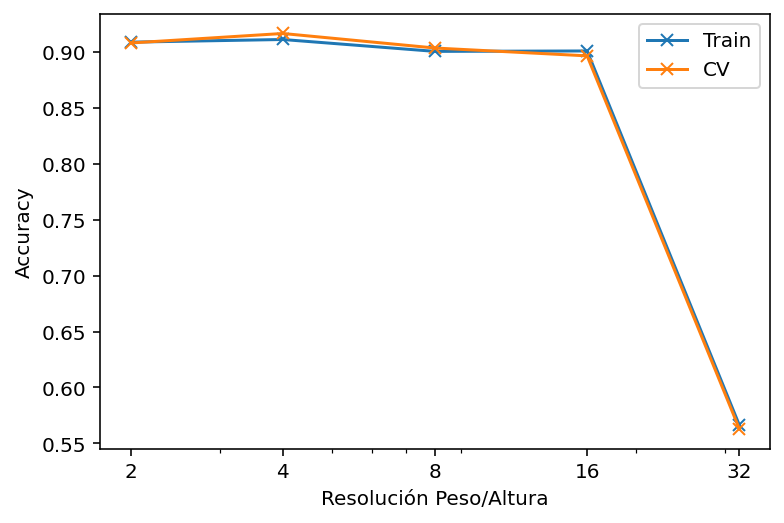

In [31]:
%matplotlib inline
plt.xscale('log')
plt.plot(steps, train_acc, label='Train', marker='x')
plt.plot(steps, test_acc, label='CV', marker='x')
plt.xticks(steps, steps)
plt.xlabel('Resolución Peso/Altura')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Clasificador Naive Bayes 

## Naive Bayes (Supongo independencia)

\begin{equation}
\large
P(X_1,X_2 | Género) = P(X_1 | Género) P(X_1 | Género)
\end{equation}

In [32]:
step = 2
maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

joint_hombres = BiVariateJoint(data_hombres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs
                              )
joint_mujeres = BiVariateJoint(data_mujeres, 
                               step_X = step, 
                               step_Y = step,
                               mins = mins, 
                               maxs = maxs)

In [33]:
def getAxis():
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    ax1.set_xlabel('Pesos [cms]')
    ax1.set_ylabel('Alturas [cms]')
    ax2.set_xlabel('Pesos [kgs]')
    ax2.set_ylabel('Alturas [cms]')
    ax2.set_zlabel('Frecuencia')
    fig.tight_layout()
    return ax1, ax2

def get_indep_likelihoods(joint_hombres, joint_mujeres):
    marg_pesos_hombres,  marg_alturas_hombres = joint_hombres.get_Marginals()
    marg_pesos_mujeres,  marg_alturas_mujeres = joint_mujeres.get_Marginals()
    marg_pesos_hombres_rep, marg_alturas_hombres_rep = np.meshgrid(marg_pesos_hombres, 
                                                                   marg_alturas_hombres)
    marg_pesos_mujeres_rep, marg_alturas_mujeres_rep = np.meshgrid(marg_pesos_mujeres, 
                                                                   marg_alturas_mujeres)
    likelihood_indep_class_1 = (marg_pesos_hombres_rep*marg_alturas_hombres_rep).T
    likelihood_indep_class_2 = (marg_pesos_mujeres_rep*marg_alturas_mujeres_rep).T
    return likelihood_indep_class_1, likelihood_indep_class_2

In [34]:
marg_pesos_hombres,  marg_alturas_hombres = joint_hombres.get_Marginals(normalized=False)
marg_pesos_mujeres,  marg_alturas_mujeres = joint_mujeres.get_Marginals(normalized=False)

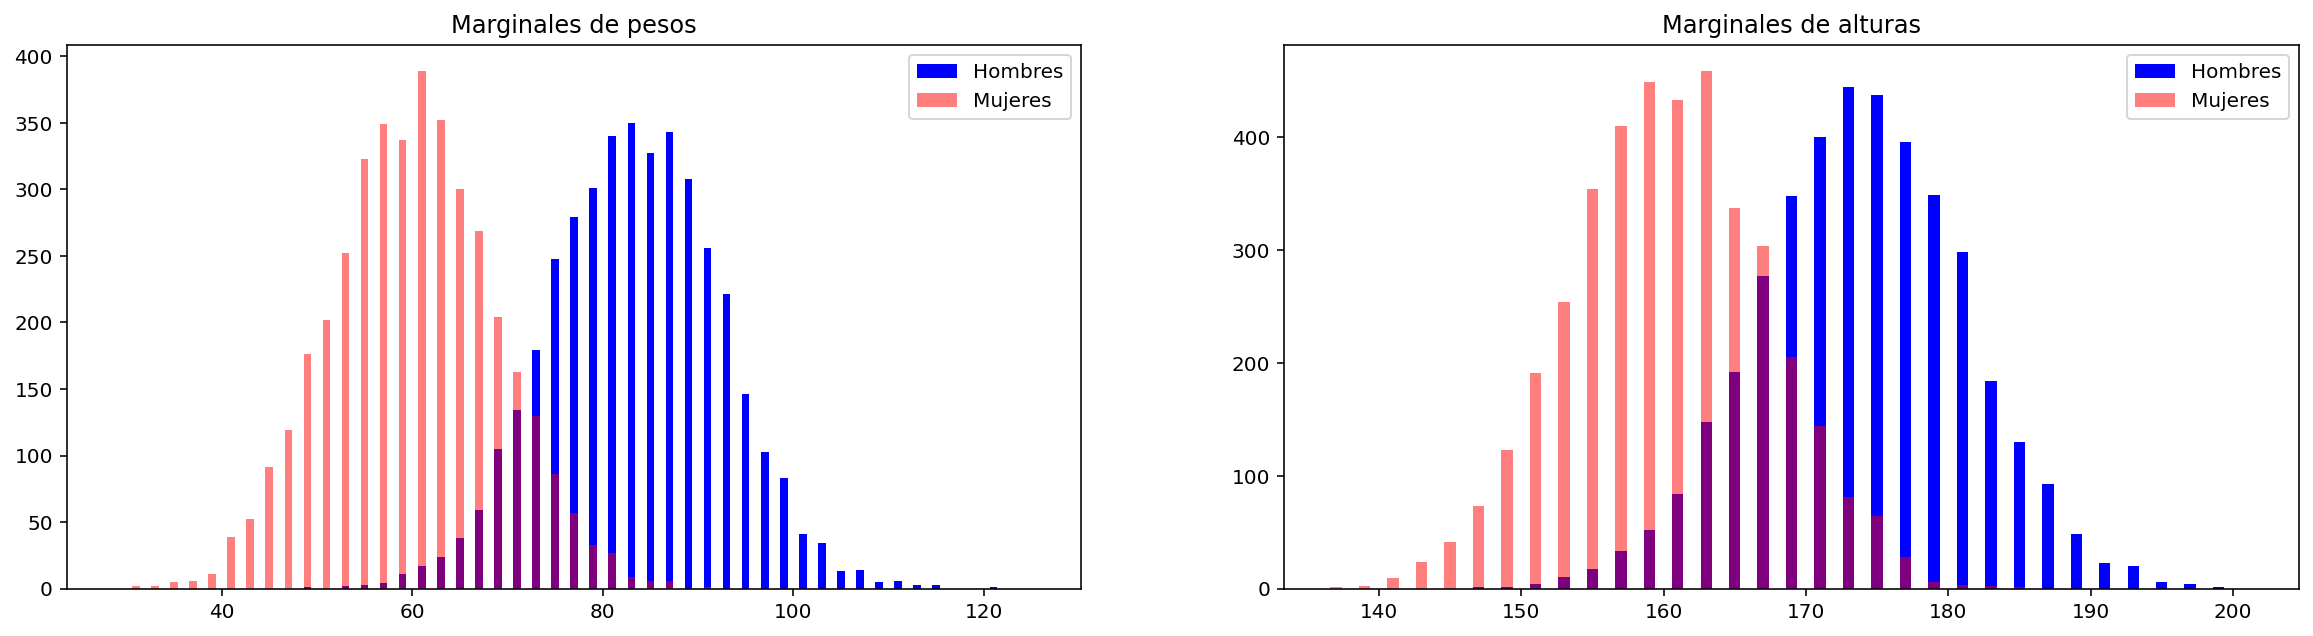

In [35]:
%matplotlib inline
f, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].bar(joint_hombres.X, marg_pesos_hombres, color='b', label='Hombres')
ax[0].bar(joint_mujeres.X, marg_pesos_mujeres, alpha=0.5, color='r', label='Mujeres')
ax[1].bar(joint_hombres.Y, marg_alturas_hombres, color='b', label='Hombres')
ax[1].bar(joint_mujeres.Y, marg_alturas_mujeres, alpha=0.5, color='r', label='Mujeres')
ax[0].set_title('Marginales de pesos')
ax[1].set_title('Marginales de alturas')
ax[0].legend()
ax[1].legend()
plt.show()

In [36]:
marg_pesos_hombres_rep, marg_alturas_hombres_rep = np.meshgrid(marg_pesos_hombres, marg_alturas_hombres)
marg_pesos_mujeres_rep, marg_alturas_mujeres_rep = np.meshgrid(marg_pesos_mujeres, marg_alturas_mujeres)

likelihood_indep_class_1 = (marg_pesos_hombres_rep*marg_alturas_hombres_rep).T
likelihood_indep_class_2 = (marg_pesos_mujeres_rep*marg_alturas_mujeres_rep).T

### Calculo a posteriori
\begin{equation}
P(Hombre | X_1, X_2) = \frac{P(X_1 | Hombre) P(X_2 | Hombre) P(Hombre)}{P(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{P(X_1 | Mujer) P(X_2 | Mujer) P(Mujer)}{P(X_1,X_2)}
\end{equation}

In [38]:
p_class_1, p_class_2 = get_class_prob_naive(data['Peso'].values, 
                                            data['Altura'].values, 
                                            joint_hombres, 
                                            joint_mujeres, 
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2)
acc_train_nbayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)
print(acc_train_nbayes)

0.883


In [39]:
p_class_1, p_class_2 = get_class_prob_naive(test['Peso'].values, 
                                            test['Altura'].values,
                                            joint_hombres, 
                                            joint_mujeres, 
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2
                                           )
acc_cv_nbayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
print(acc_cv_nbayes)

0.8805


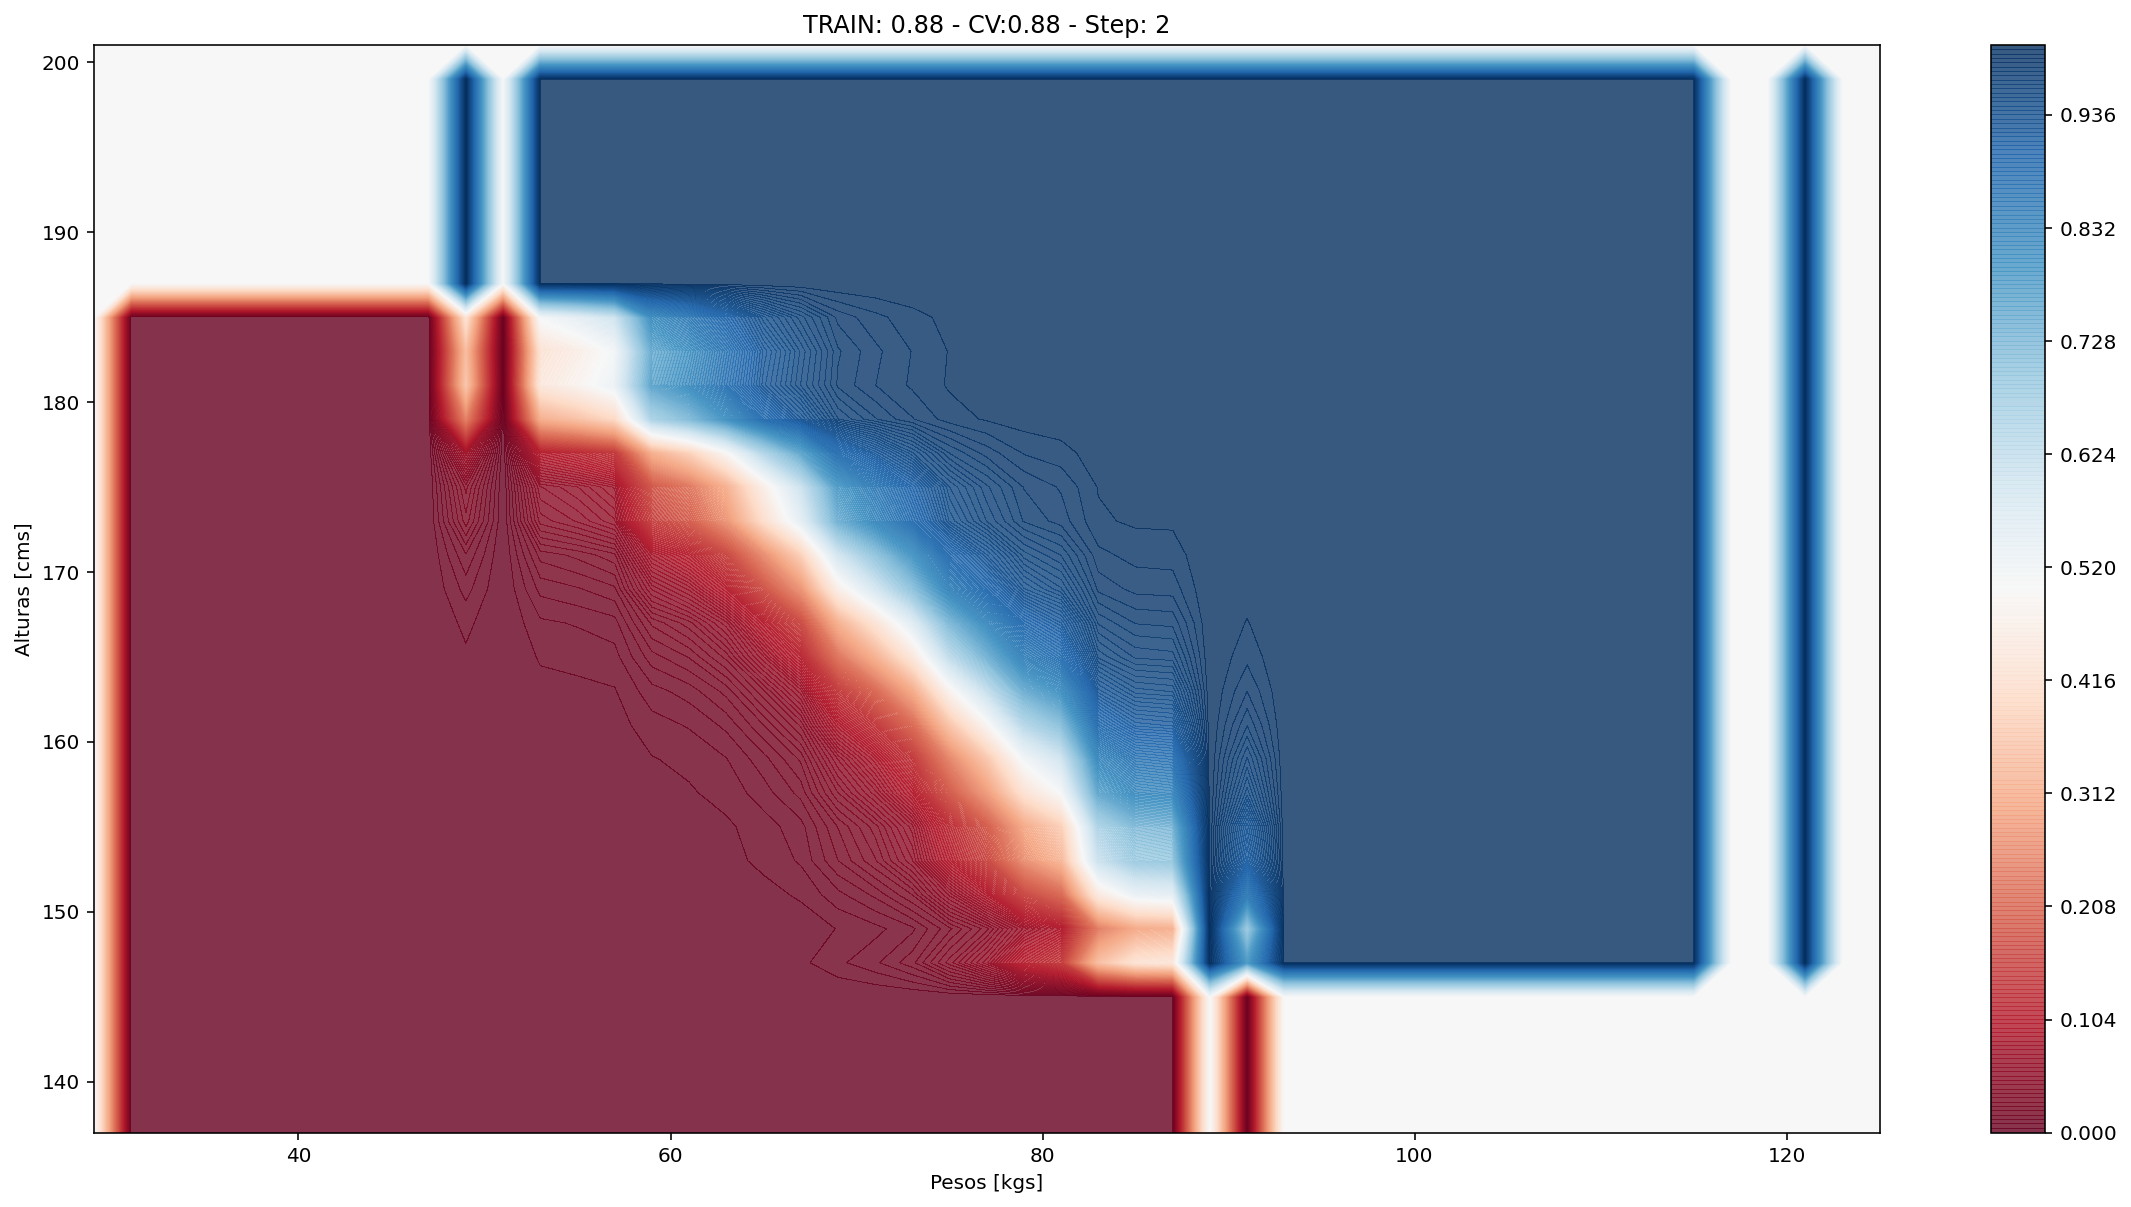

In [40]:
X, Y = np.meshgrid(joint_hombres.X, joint_hombres.Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    Z[i] = get_class_prob_naive(X[i], 
                                Y[i],
                               joint_hombres,
                               joint_mujeres, 
                               likelihood_indep_class_1,
                                           likelihood_indep_class_2)[0]
    
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.set_title('TRAIN: ' + str(np.round(acc_train_nbayes*100)/100) + ' - CV:' + str(np.round(acc_cv_nbayes*100)/100) +' - Step: '+str(step))
ax.set_xlabel('Pesos [kgs]')
ax.set_ylabel('Alturas [cms]')
plt.show()

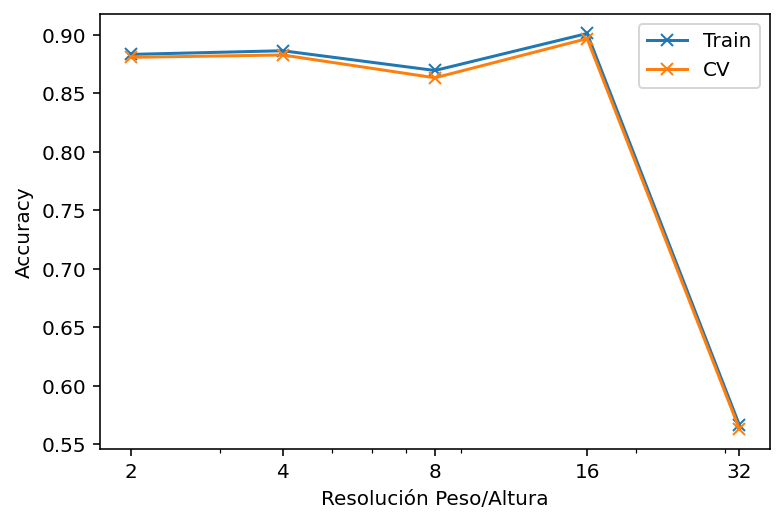

In [42]:
train_acc = []
test_acc = []
steps = [2, 4,  8, 16, 32]
for step in steps:
    maxs = np.round(data[['Peso','Altura']].values.max(axis = 0))
    mins = np.round(data[['Peso','Altura']].values.min(axis = 0))

    joint_hombres = BiVariateJoint(data_hombres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs
                                  )
    joint_mujeres = BiVariateJoint(data_mujeres, 
                                   step_X = step, 
                                   step_Y = step,
                                   mins = mins, 
                                   maxs = maxs)
    
    likelihood_indep_class_1, likelihood_indep_class_2 = get_indep_likelihoods(joint_hombres, joint_mujeres)
    
    p_class_1, p_class_2 = get_class_prob_naive(data['Peso'].values, 
                                            data['Altura'].values, 
                                            joint_hombres, 
                                            joint_mujeres, 
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2)
    acc_train_nbayes = ((p_class_1>p_class_2) == (data['Genero'].values == 'Hombre')).sum()/len(data)

    train_acc.append(acc_train_nbayes)
    p_class_1, p_class_2 = get_class_prob_naive(test['Peso'].values, 
                                            test['Altura'].values,
                                            joint_hombres, 
                                            joint_mujeres, 
                                           likelihood_indep_class_1,
                                           likelihood_indep_class_2
                                           )
    acc_cv_nbayes = ((p_class_1>p_class_2) == (test['Genero'].values == 'Hombre')).sum()/len(test)
    test_acc.append(acc_cv_nbayes)
  
%matplotlib inline
plt.xscale('log')
plt.plot(steps, train_acc, label='Train', marker='x')
plt.plot(steps, test_acc, label='CV', marker='x')
plt.xticks(steps, steps)
plt.xlabel('Resolución Peso/Altura')
plt.ylabel('Accuracy')
plt.legend()
plt.show()